In [42]:
from simply import redshift
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
%config InlineBackend.figure_format ='retina'

In [45]:
unemployment = redshift("""unemployment.sql""")

In [46]:
unemployment.tail()

,month,num_paycheck_or_ui_this_month,paycheck_or_ui_last_month_no_paycheck_no_ui_this_month,paycheck_this_month,paycheck_last_month_no_paycheck_or_ui_this_month,paycheck_last_month_no_paycheck_this_month,num_ui_this_month,ui_deposit_last_month_no_paycheck_or_ui_this_month,ui_deposit_last_month_no_ui_deposit_this_month,paycheck_last_month_no_paycheck_this_month_ui_deposit_this_month
13,2020-02-01,101293,8090,100658,7976,8097,945,129,311,121
14,2020-03-01,101557,7330,100727,7223,7381,1569,126,267,158
15,2020-04-01,100592,10025,95827,9951,11964,8873,85,200,2013
16,2020-05-01,103495,7552,93955,7323,9796,14319,291,860,2473
17,2020-06-01,106014,6992,95292,6009,7224,15869,1118,2616,1215


In [47]:
help(plt.style.use)

Help on function use in module matplotlib.style.core:

use(style)
    Use matplotlib style settings from a style specification.
    
    The style name of 'default' is reserved for reverting back to
    the default style settings.
    
    Parameters
    ----------
    style : str, dict, or list
        A style specification. Valid options are:
    
        +------+-------------------------------------------------------------+
        | str  | The name of a style or a path/URL to a style file. For a    |
        |      | list of available style names, see `style.available`.       |
        +------+-------------------------------------------------------------+
        | dict | Dictionary with valid key/value pairs for                   |
        |      | `matplotlib.rcParams`.                                      |
        +------+-------------------------------------------------------------+
        | list | A list of style specifiers (str or dict) applied from first |
        |      |

In [48]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [49]:
plt.style.use('seaborn')

In [50]:
first_time_unemployment = redshift("""
with unemployment as (
select
	user_ref,
	min(transaction_date) as first_unemployment_date
from curated.fact_transaction
where is_possible_unemployment = true
group by 1
	)

select
	date_trunc('month',first_unemployment_date)::date as month,
	count(distinct user_ref) as new_customers_unemployment
from unemployment
where first_unemployment_date >= '2019-12-31'
group by 1
order by 1
;
""")

In [51]:
first_time_unemployment

,month,new_customers_unemployment
0,2019-12-01,22
1,2020-01-01,232
2,2020-02-01,208
3,2020-03-01,766
4,2020-04-01,6969
5,2020-05-01,5946
6,2020-06-01,5145
7,2020-07-01,5195


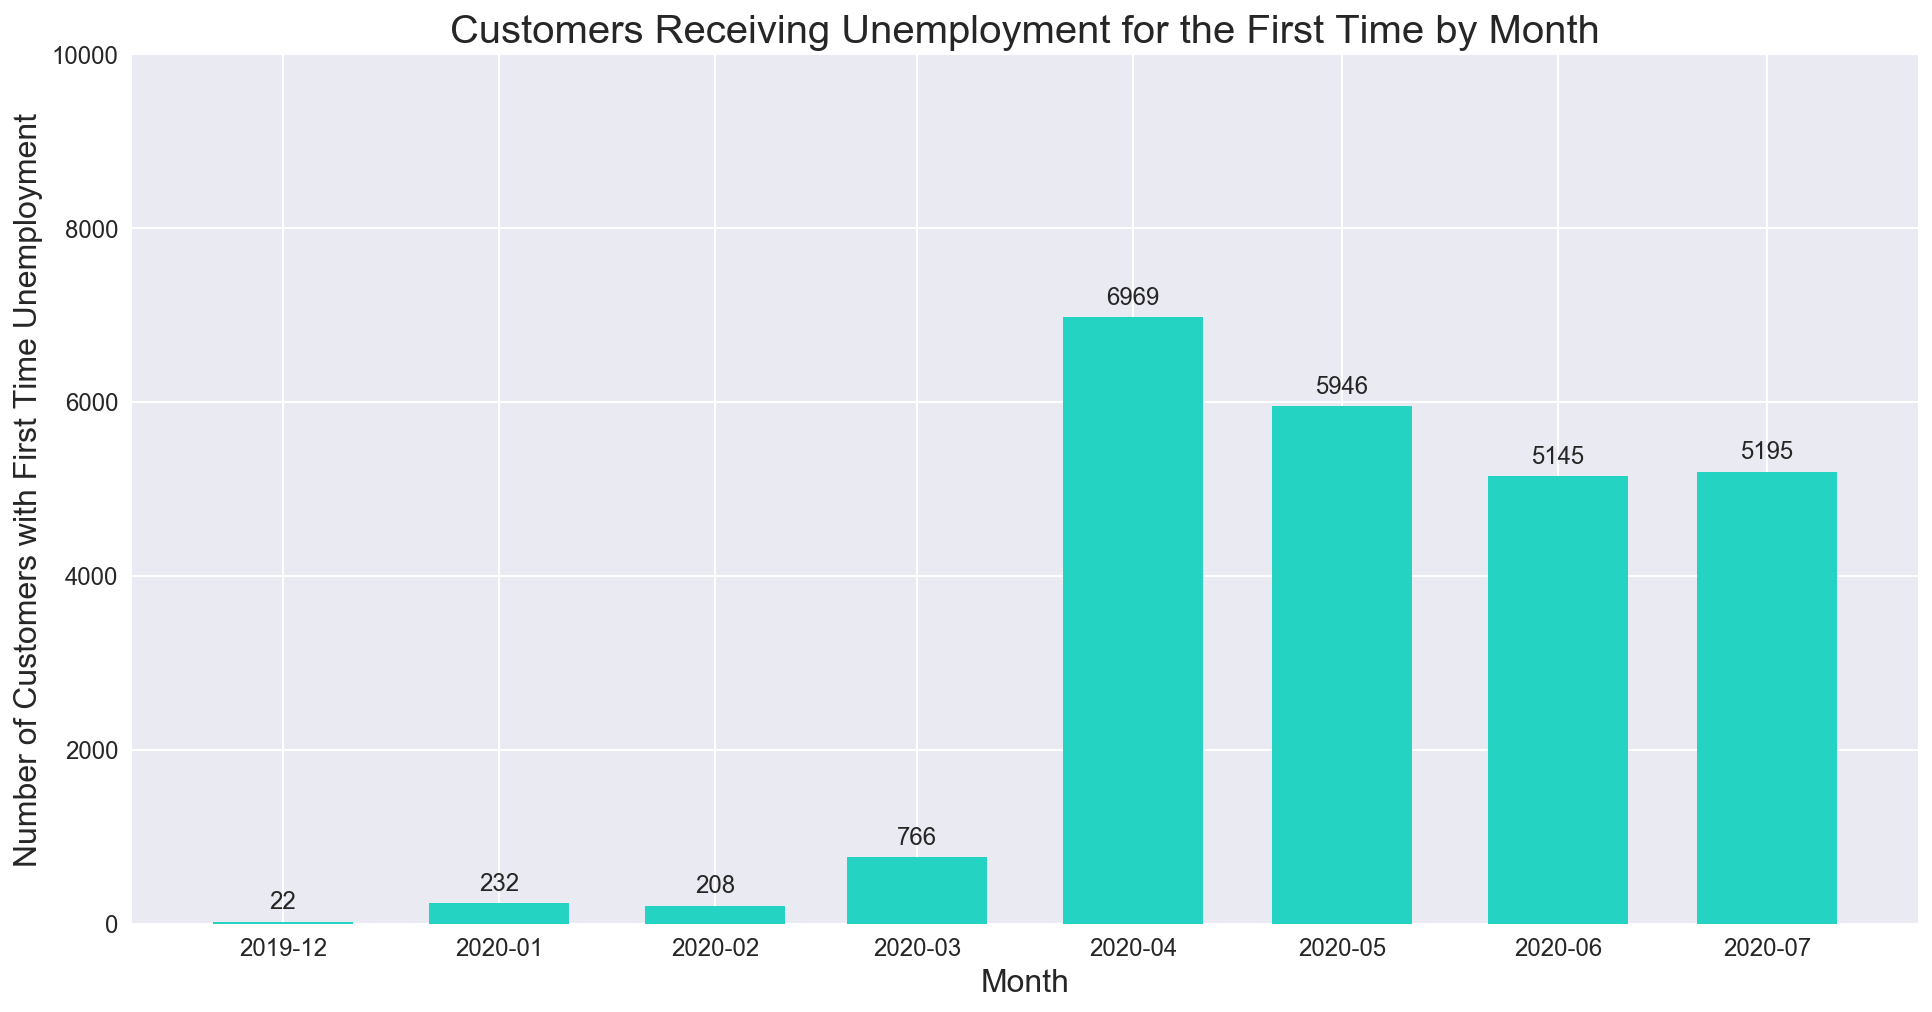

In [52]:
fig, ax = plt.subplots(figsize=(16,8))

width = 20

ax = plt.bar(first_time_unemployment.month, first_time_unemployment.new_customers_unemployment, width, color = '#24D3C1')


plt.ylim(0,10000)
plt.xlabel('Month', fontsize = 16)
plt.xticks(fontsize = 12)
plt.ylabel('Number of Customers with First Time Unemployment', fontsize = 16)
plt.yticks(fontsize = 12)
plt.title('Customers Receiving Unemployment for the First Time by Month', fontsize = 20)

for m in first_time_unemployment.month:
    plt.text(m, 
             first_time_unemployment[first_time_unemployment.month == m].new_customers_unemployment+150, 
             str(int(first_time_unemployment[first_time_unemployment.month == m].new_customers_unemployment)),
            fontsize=12,
            ha='center')

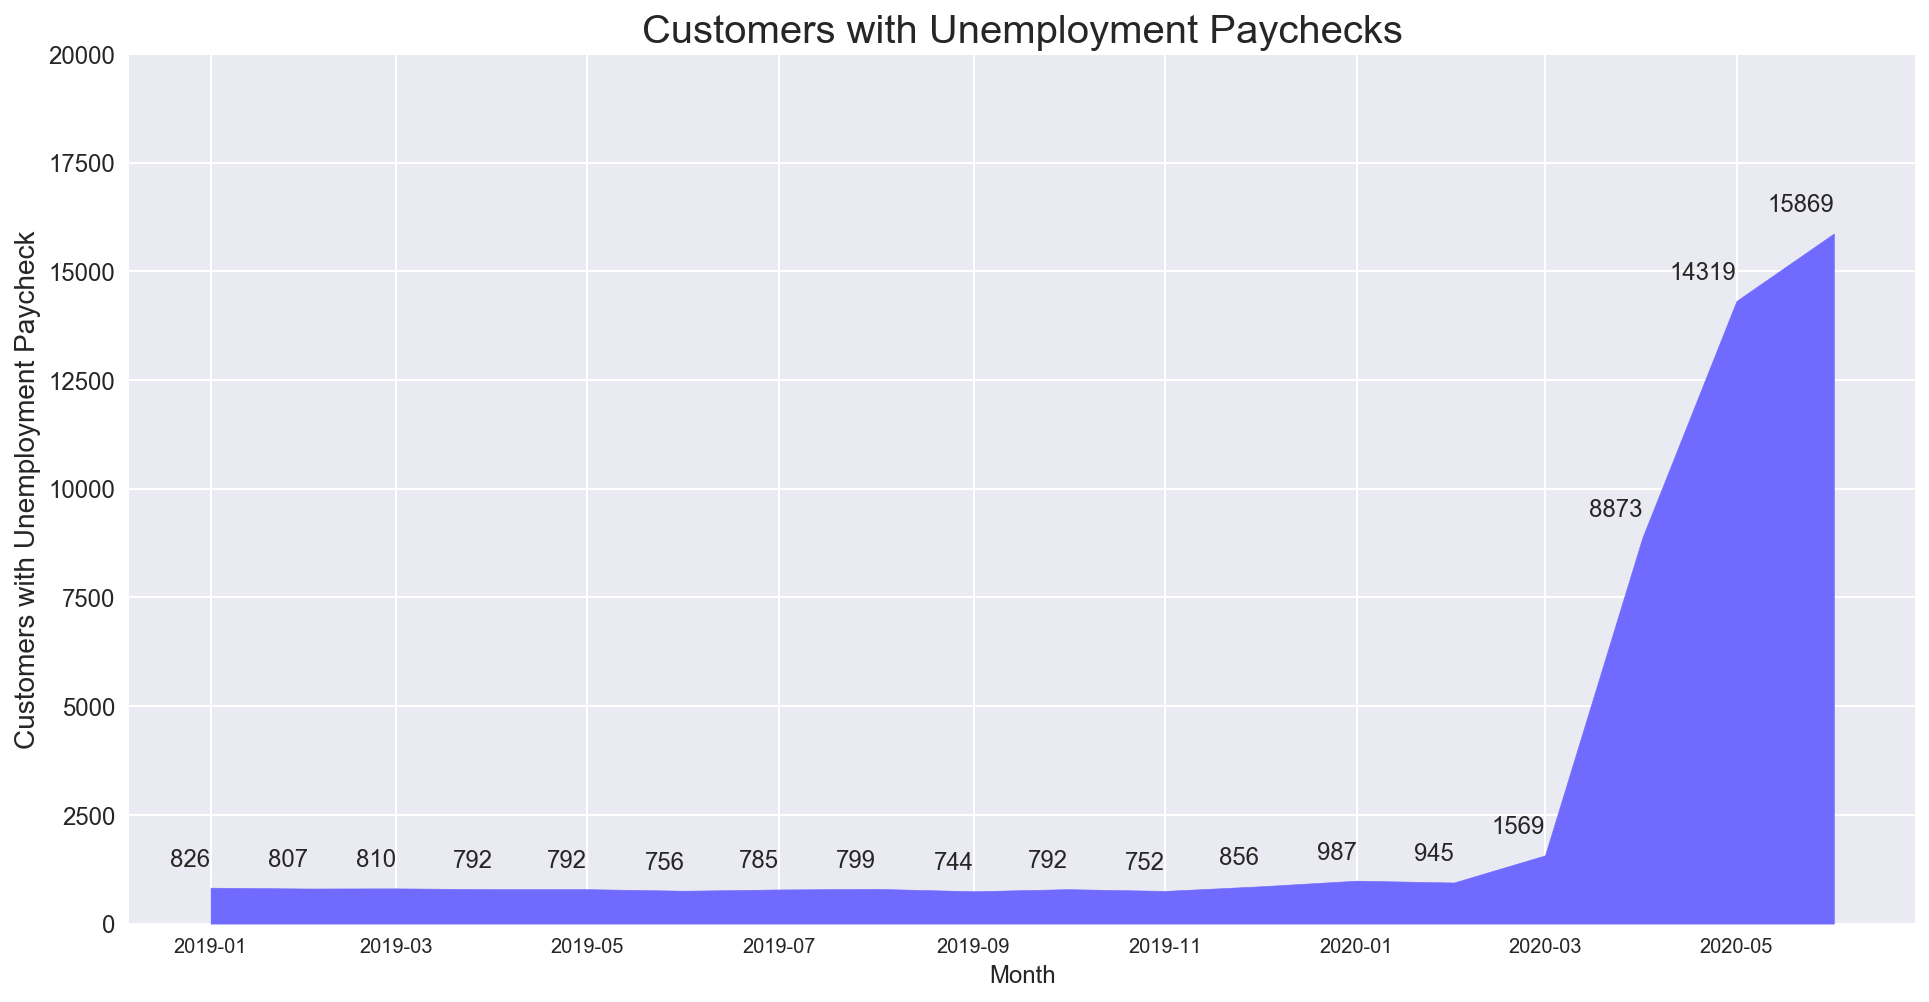

In [53]:
fig, ax = plt.subplots(figsize=(16,8))

plt.fill_between(unemployment.month, 0, unemployment.num_ui_this_month, color = '#706AFE')

plt.ylim(0,20000)
plt.xlabel('Month', fontsize = 12)
#plt.xticks(fontsize = 12)
plt.ylabel('Customers with Unemployment Paycheck', fontsize = 14)
plt.yticks(fontsize = 12)
plt.title('Customers with Unemployment Paychecks', fontsize = 20)

for m in unemployment.month:
    plt.text(m, 
             unemployment[unemployment.month == m].num_ui_this_month+500, 
             str(int(unemployment[unemployment.month == m].num_ui_this_month)),
            fontsize=12,
            ha='right')

#plt.legend(['Individual Protected','Shared Protected'], fontsize=10)
# plt.grid(False)

# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(round(height,3)),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     textcoords="offset points",
#                     xytext=(0,5),
#                     ha='center', va='bottom')

# autolabel(p1)
# autolabel(p2)

#plt.axvline(p1_x_value)

plt.show()

In [54]:
customers_ui_enrolled_prior_to_march2020 = redshift("""customers_ui_enrolled_prior_to_march2020.sql""")

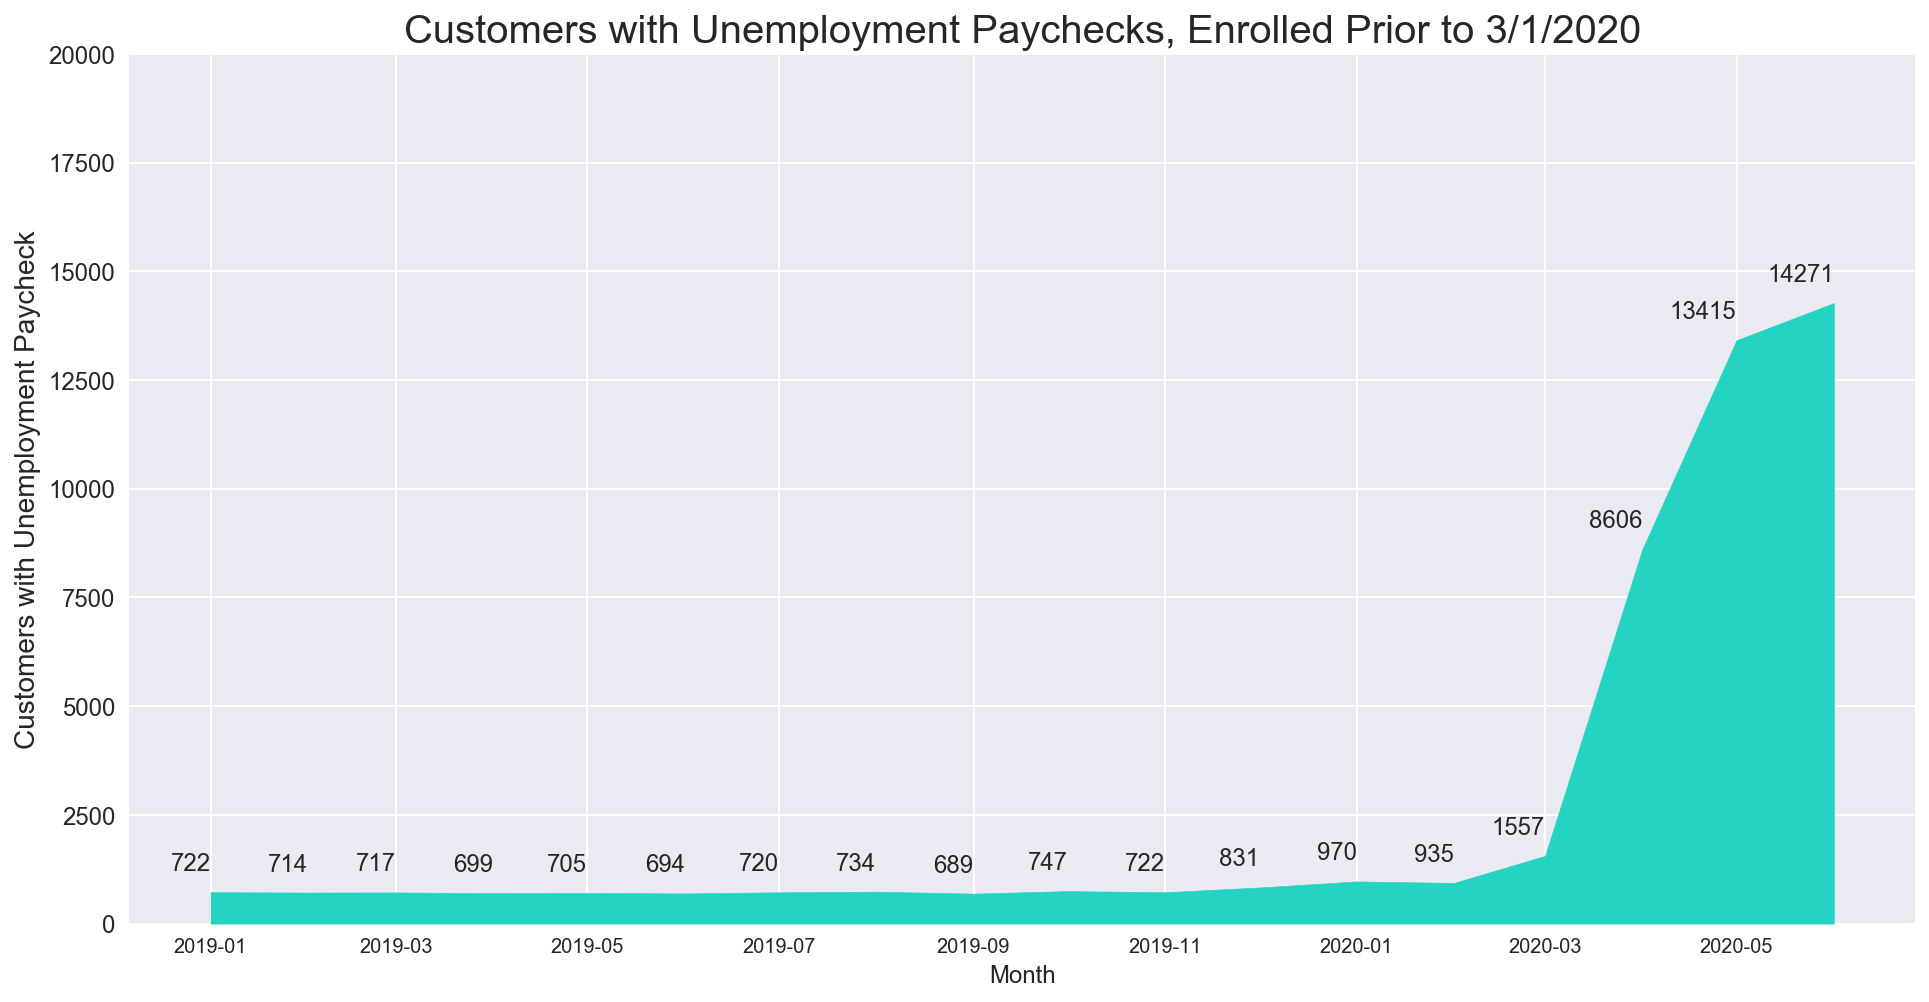

In [55]:
fig, ax = plt.subplots(figsize=(16,8))

plt.fill_between(customers_ui_enrolled_prior_to_march2020.month, 0, customers_ui_enrolled_prior_to_march2020.customers, color = '#24D3C1')

plt.ylim(0,20000)
plt.xlabel('Month', fontsize = 12)
#plt.xticks(fontsize = 12)
plt.ylabel('Customers with Unemployment Paycheck', fontsize = 14)
plt.yticks(fontsize = 12)
plt.title('Customers with Unemployment Paychecks, Enrolled Prior to 3/1/2020', fontsize = 20)

for m in customers_ui_enrolled_prior_to_march2020.month:
    plt.text(m, 
             customers_ui_enrolled_prior_to_march2020[customers_ui_enrolled_prior_to_march2020.month == m].customers+500, 
             str(int(customers_ui_enrolled_prior_to_march2020[customers_ui_enrolled_prior_to_march2020.month == m].customers)),
            fontsize=12,
            ha='right')

plt.show()

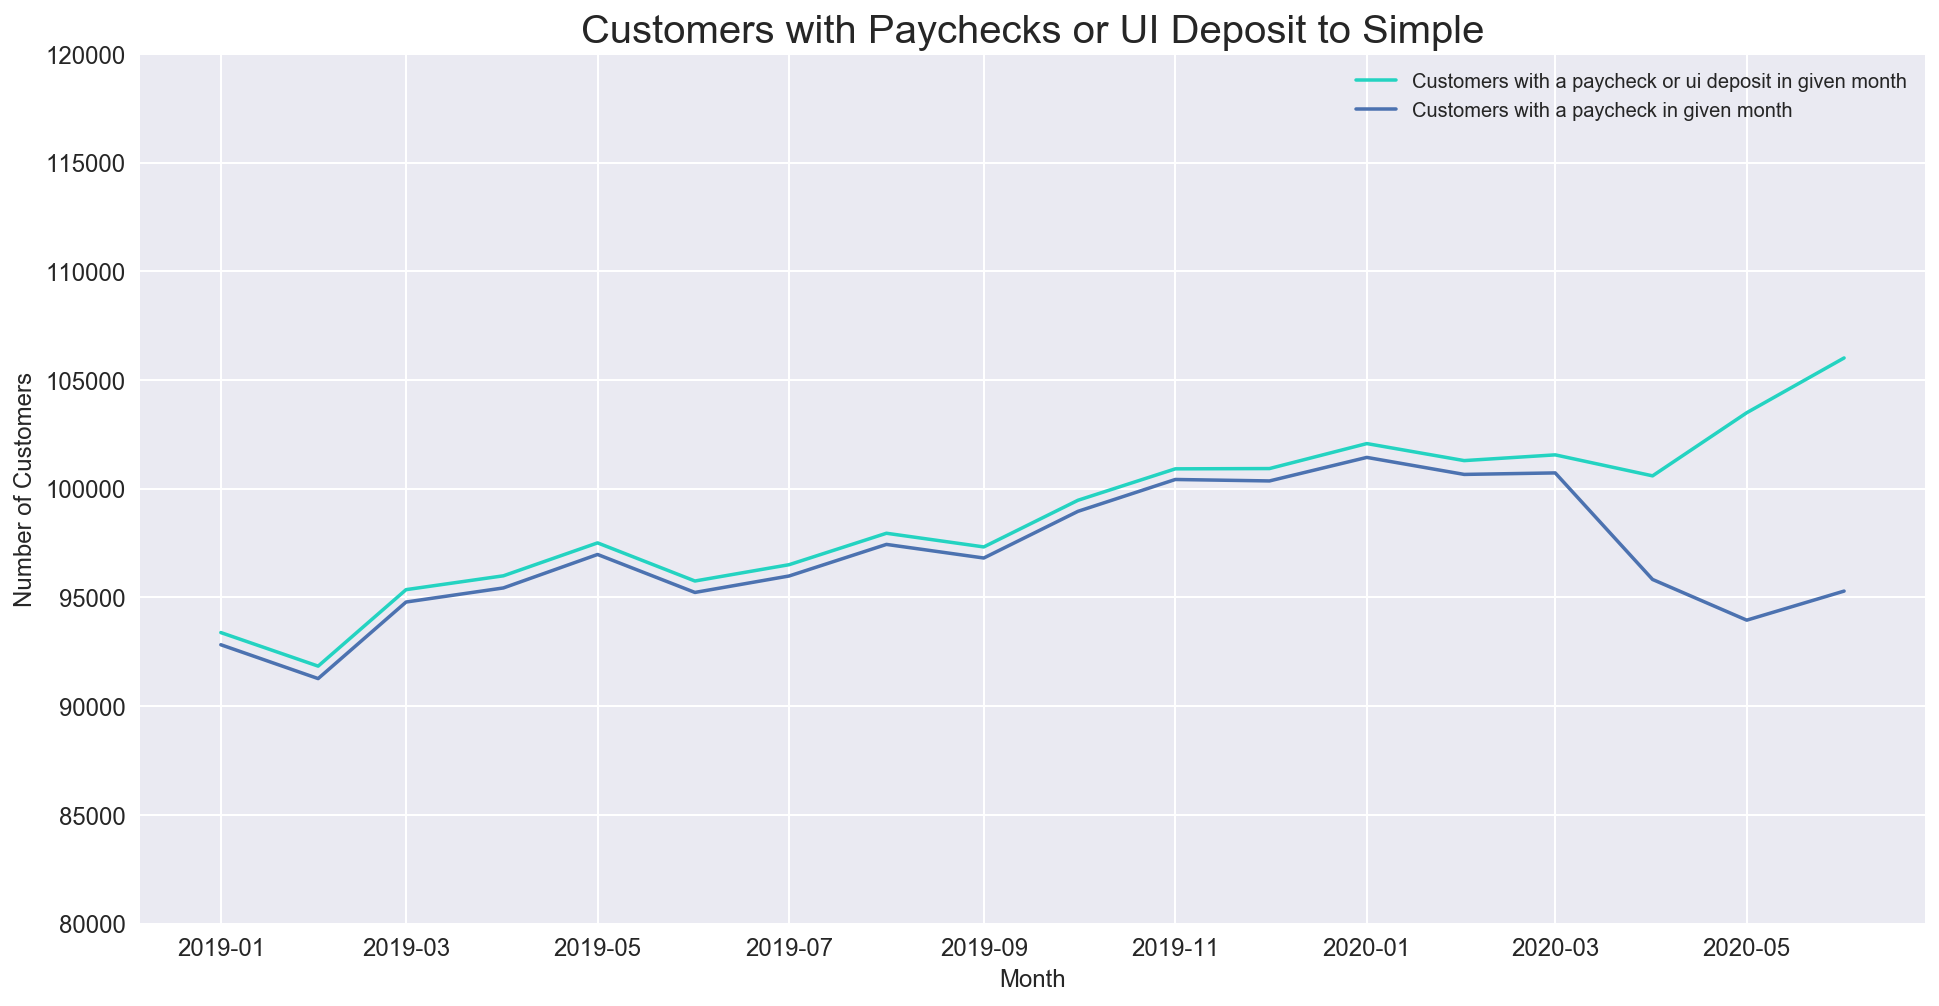

In [56]:
fig, ax = plt.subplots(figsize=(16,8))


p1 = ax.plot(unemployment.month,unemployment.num_paycheck_or_ui_this_month, color = '#24D3C1')
p2 = ax.plot(unemployment.month,unemployment.paycheck_this_month)


plt.ylim(80000,120000)
plt.xlabel('Month', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Customers with Paychecks or UI Deposit to Simple', fontsize = 20)
plt.legend(['Customers with a paycheck or ui deposit in given month','Customers with a paycheck in given month'])
# for m in unemployment.month:
#     plt.text(m, 
#              unemployment[unemployment.month == m].num_ui_this_month+500, 
#              str(int(unemployment[unemployment.month == m].num_ui_this_month)),
#             fontsize=12,
#             ha='right')


plt.show()

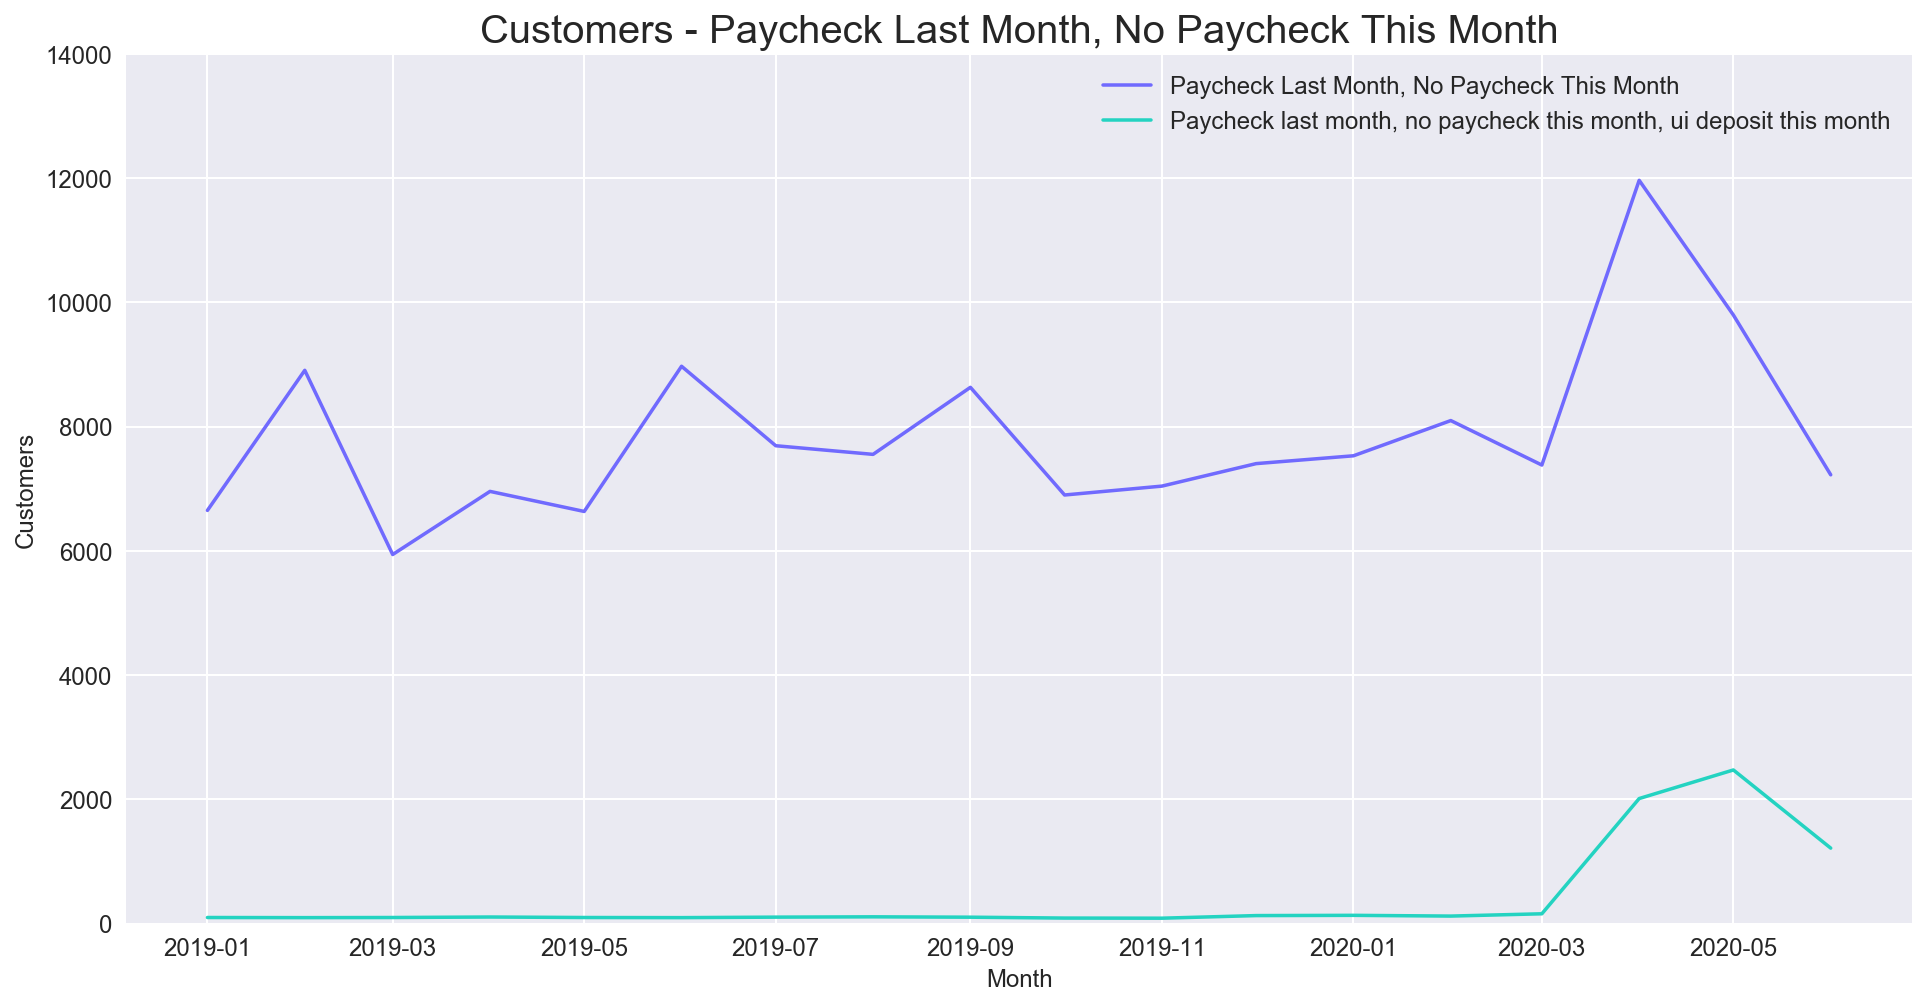

In [57]:
fig, ax = plt.subplots(figsize=(16,8))

#ax1 = ax.plot(unemployment.month,unemployment.paycheck_or_ui_last_month_no_paycheck_no_ui_this_month, color = '#706AFE')
ax2 = ax.plot(unemployment.month,unemployment.paycheck_last_month_no_paycheck_this_month, color = '#706AFE')
ax3 = ax.plot(unemployment.month,unemployment.paycheck_last_month_no_paycheck_this_month_ui_deposit_this_month, color = '#24D3C1')

plt.ylim(0,14000)
plt.xlabel('Month', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('Customers', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Customers - Paycheck Last Month, No Paycheck This Month', fontsize = 20)

plt.legend(['Paycheck Last Month, No Paycheck This Month ','Paycheck last month, no paycheck this month, ui deposit this month'], fontsize = 12)

plt.show()

In [61]:
demographics = redshift("""demographics.sql""")

In [62]:
demographics.head()

,user_ref,state_located,has_protected_account,has_shared_checking_account,has_loan_accounts,has_expense,has_emergency_fund,has_standard_goal,is_profitable
0,0284fa8a-c207-44dd-9a03-5cdeb9620c81,NY,1,1,0,0,1,0,1
1,0307bff8-f1d5-492b-a493-f7b7710c9c6d,NC,1,0,0,1,1,0,1
2,063e1968-595d-47fb-adf3-7e6daf114912,NY,0,0,0,0,0,1,1
3,069fe549-7128-4bec-b2d9-812b9372a510,NY,1,0,0,0,1,0,1
4,06f3d2e6-4772-480d-9da5-1dcc9853a343,WA,0,0,0,0,0,0,1


In [63]:
demographics.describe()

,has_protected_account,has_shared_checking_account,has_loan_accounts,has_expense,has_emergency_fund,has_standard_goal,is_profitable
count,19137.000000,19137.000000,19137.000000,19137.000000,19137.000000,19137.000000,19137.000000
mean,0.542248,0.206406,0.001254,0.314574,0.170716,0.332811,0.892146
std,0.498225,0.404736,0.035392,0.464358,0.376271,0.471232,0.310204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
state = demographics.groupby(['state_located']).count().reset_index().reset_index()

In [65]:
state[['index','state_located','user_ref']].head()

,index,state_located,user_ref
0,0,AK,15
1,1,AL,221
2,2,AR,98
3,3,AZ,343
4,4,CA,135


In [66]:
state.head()

,index,state_located,user_ref,has_protected_account,has_shared_checking_account,has_loan_accounts,has_expense,has_emergency_fund,has_standard_goal,is_profitable
0,0,AK,15,15,15,15,15,15,15,15
1,1,AL,221,221,221,221,221,221,221,221
2,2,AR,98,98,98,98,98,98,98,98
3,3,AZ,343,343,343,343,343,343,343,343
4,4,CA,135,135,135,135,135,135,135,135


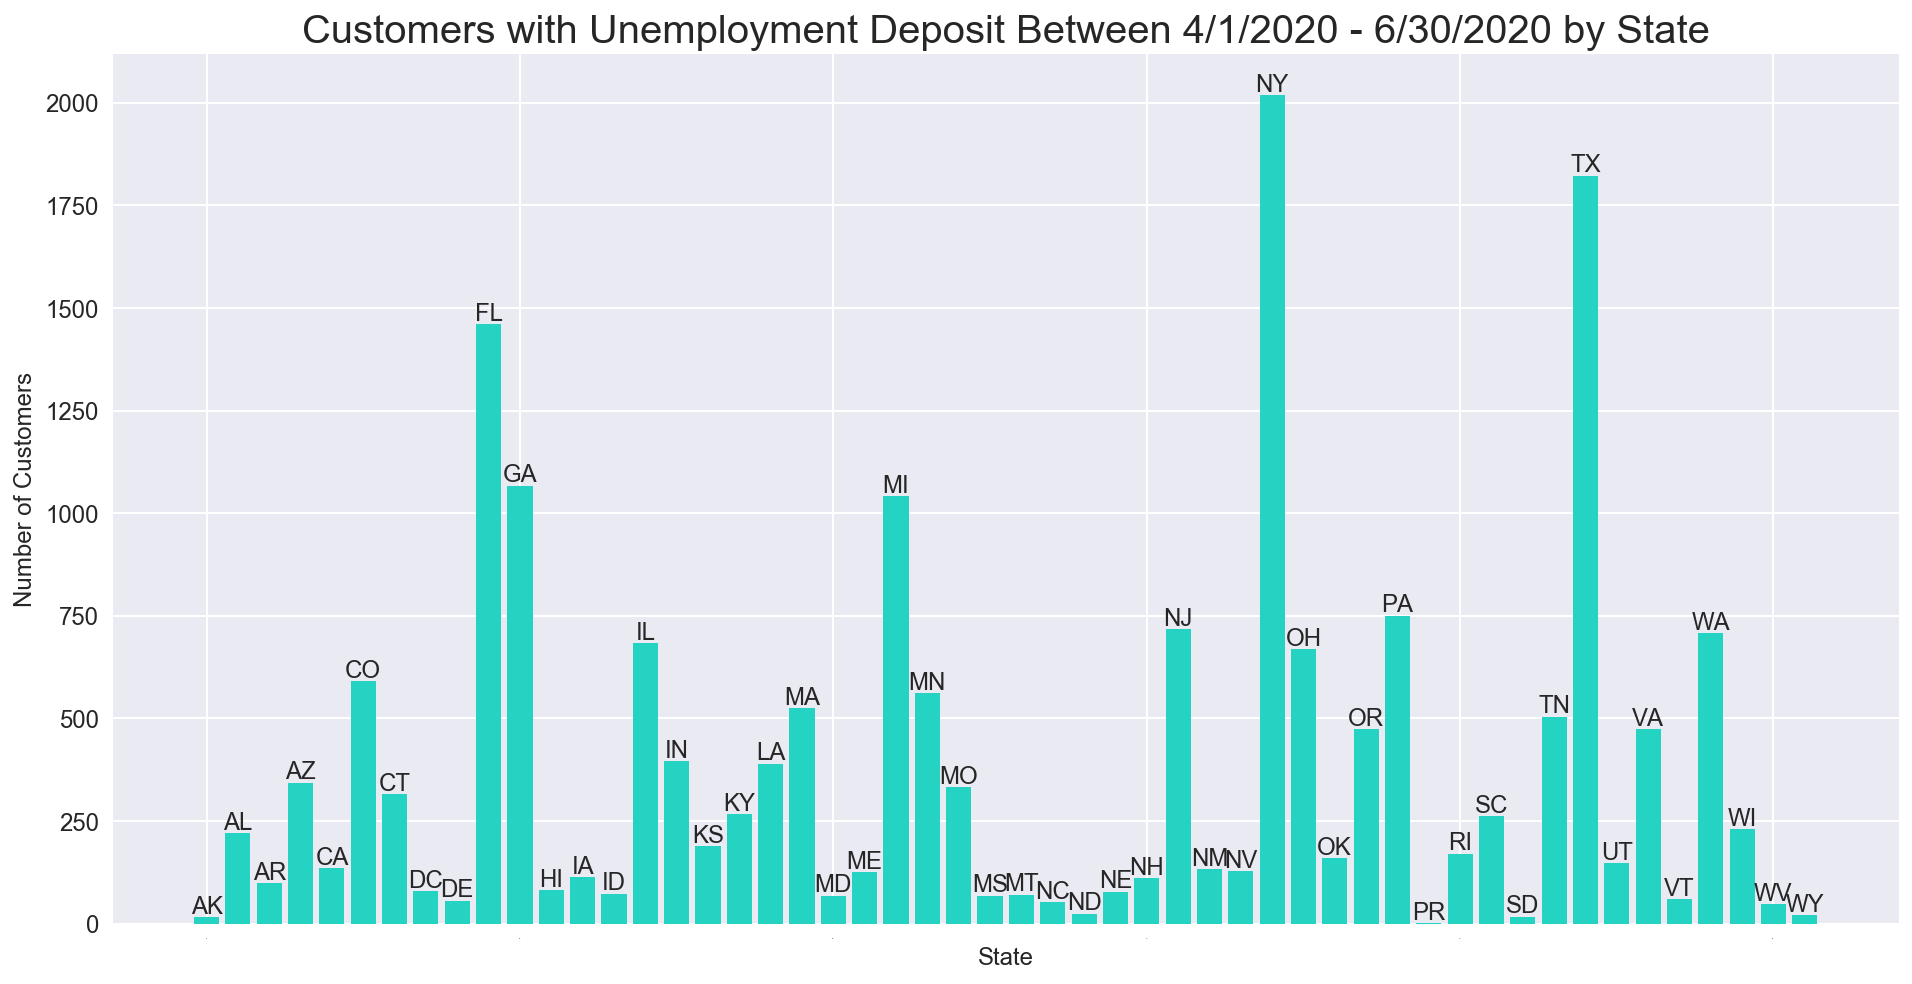

In [79]:
fig, ax = plt.subplots(figsize=(16,8))

ax = plt.bar(state.index, state.user_ref, color = '#24D3C1' )

#plt.ylim(0,3000)
plt.xlabel('State', fontsize = 12)
plt.xticks(fontsize = 0)
plt.ylabel('Number of Customers', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Customers with Unemployment Deposit Between 4/1/2020 - 6/30/2020 by State', fontsize = 20)

for m in state.index:
    plt.text(m, 
             state[state.index == m].user_ref+10,
             str((state[state.index == m].state_located.item())),
            fontsize=12,
            ha='center'
            )

In [68]:
# state.state_located

In [69]:
for m in state.index:
    print(str((state[state.index == m].state_located.item())))

AK
AL
AR
AZ
CA
CO
CT
DC
DE
FL
GA
HI
IA
ID
IL
IN
KS
KY
LA
MA
MD
ME
MI
MN
MO
MS
MT
NC
ND
NE
NH
NJ
NM
NV
NY
OH
OK
OR
PA
PR
RI
SC
SD
TN
TX
UT
VA
VT
WA
WI
WV
WY


In [71]:
state_all_customers = redshift("""state_unemployment_rate.sql""")

In [72]:
all_customers = state_all_customers.reset_index()

In [73]:
all_customers.head()

,index,state,customers
0,0,AE,11
1,1,AK,226
2,2,AL,2948
3,3,AP,6
4,4,AR,1692


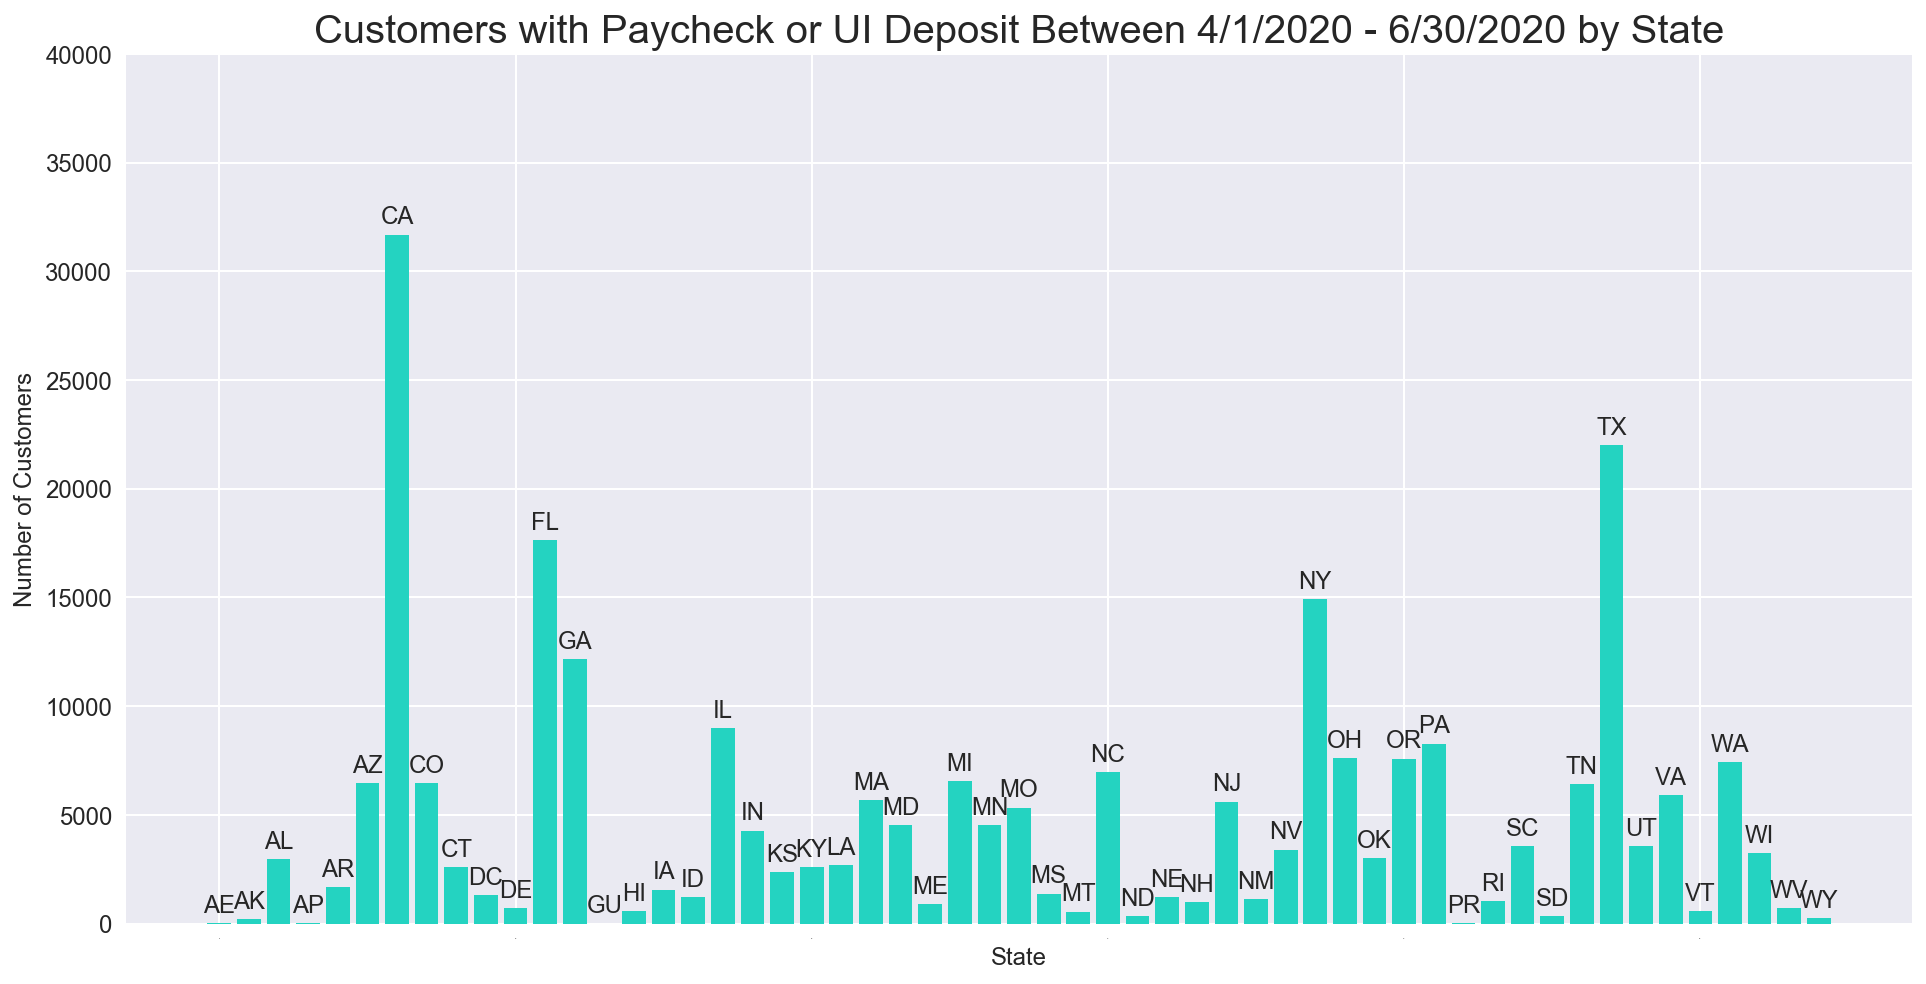

In [80]:
fig, ax = plt.subplots(figsize=(16,8))

ax = plt.bar(all_customers.index, all_customers.customers, color = '#24D3C1' )

plt.ylim(0,40000)
plt.xlabel('State', fontsize = 12)
plt.xticks(fontsize = 0)
plt.ylabel('Number of Customers', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Customers with Paycheck or UI Deposit Between 4/1/2020 - 6/30/2020 by State', fontsize = 20)

for m in all_customers.index:
    plt.text(m, 
             all_customers[all_customers.index == m].customers+500,
             str((all_customers[all_customers.index == m].state.item())),
            fontsize=12,
            ha='center'
            )

In [81]:
merged_states = (state[['index','state_located','user_ref']].merge(all_customers[['index','state','customers']], left_on='state_located', right_on='state'))
merged_states.head()

,index_x,state_located,user_ref,index_y,state,customers
0,0,AK,15,1,AK,226
1,1,AL,221,2,AL,2948
2,2,AR,98,4,AR,1692
3,3,AZ,343,5,AZ,6453
4,4,CA,135,6,CA,31691


In [82]:
merged_states.user_ref/merged_states.customers

0     0.066372
1     0.074966
2     0.057920
3     0.053154
4     0.004260
5     0.091360
6     0.120968
7     0.060536
8     0.077029
9     0.082818
10    0.087617
11    0.144876
12    0.072158
13    0.060380
14    0.075813
15    0.092333
16    0.079412
17    0.102703
18    0.145468
19    0.092642
20    0.014958
21    0.141097
22    0.158907
23    0.123677
24    0.062441
25    0.049204
26    0.126582
27    0.007445
28    0.066298
29    0.063415
30    0.111675
31    0.127963
32    0.117181
33    0.037614
34    0.135300
35    0.087779
36    0.053033
37    0.062434
38    0.090569
39    0.090909
40    0.161597
41    0.073583
42    0.048295
43    0.078395
44    0.082717
45    0.041420
46    0.080448
47    0.103509
48    0.095431
49    0.070531
50    0.068966
51    0.080153
dtype: float64

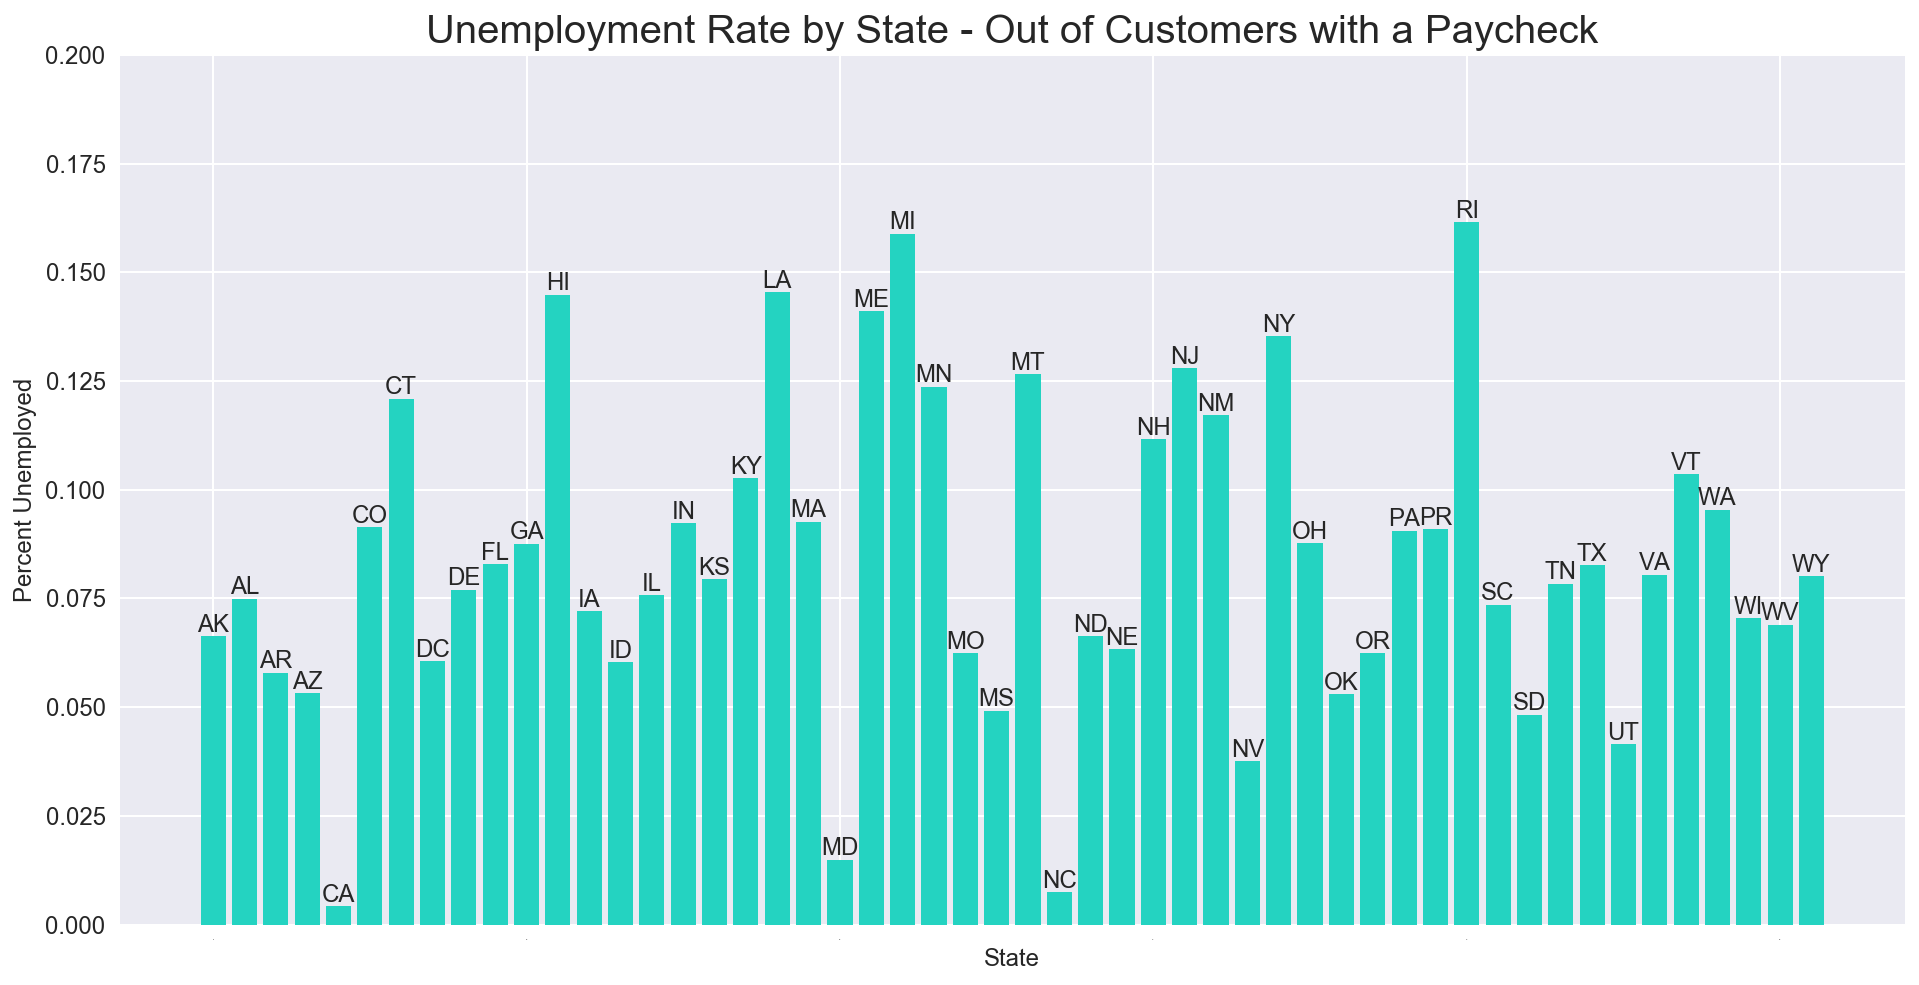

In [85]:
fig, ax = plt.subplots(figsize=(16,8))

ax = plt.bar(merged_states.index_x, (merged_states.user_ref/merged_states.customers), color = '#24D3C1' )

plt.ylim(0,0.20)
plt.xlabel('State', fontsize = 12)
plt.xticks(fontsize = 0)
plt.ylabel('Percent Unemployed', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Unemployment Rate by State - Out of Customers with a Paycheck', fontsize = 20)

for m in merged_states.index_x:
    plt.text(m, 
             (merged_states[merged_states.index_x == m].user_ref/merged_states[merged_states.index_x == m].customers)+0.001,
             str((merged_states[merged_states.index == m].state.item())),
            fontsize=12,
            ha='center'
            )

In [86]:
demographics[demographics.is_profitable == 1].describe()

,has_protected_account,has_shared_checking_account,has_loan_accounts,has_expense,has_emergency_fund,has_standard_goal,is_profitable
count,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.0
mean,0.558426,0.213026,0.001289,0.329058,0.178527,0.348796,1.0
std,0.496589,0.409458,0.035875,0.469885,0.382967,0.476603,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [87]:
demographics.describe()

,has_protected_account,has_shared_checking_account,has_loan_accounts,has_expense,has_emergency_fund,has_standard_goal,is_profitable
count,19137.000000,19137.000000,19137.000000,19137.000000,19137.000000,19137.000000,19137.000000
mean,0.542248,0.206406,0.001254,0.314574,0.170716,0.332811,0.892146
std,0.498225,0.404736,0.035392,0.464358,0.376271,0.471232,0.310204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


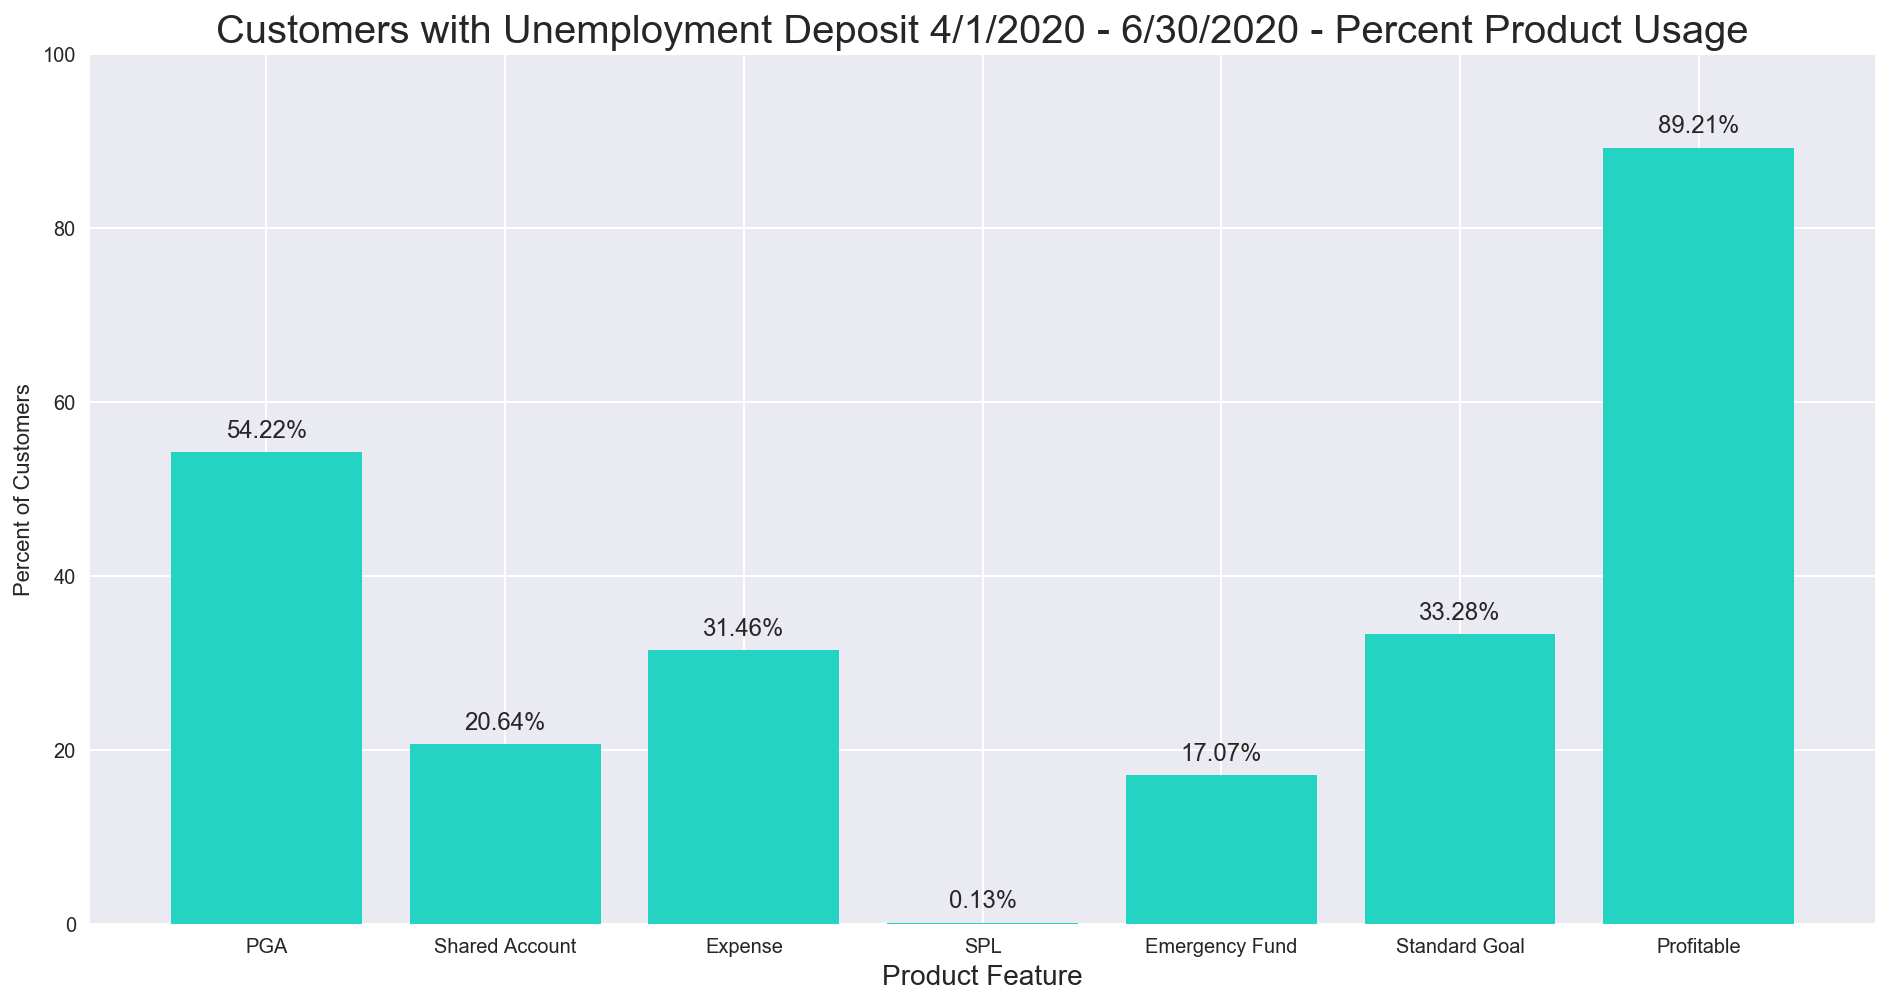

In [90]:
fig, ax = plt.subplots(figsize=(16,8))

#color = '#24D3C1'

x = [0,1,2,3,4,5,6]
y = [demographics.has_protected_account.mean()*100, 
     demographics.has_shared_checking_account.mean()*100,
     demographics.has_expense.mean()*100,
     demographics.has_loan_accounts.mean()*100,
     demographics.has_emergency_fund.mean()*100,
     demographics.has_standard_goal.mean()*100,
     demographics.is_profitable.mean()*100]

labels = ['','PGA','Shared Account','Expense','SPL','Emergency Fund','Standard Goal','Profitable']

ax1 = plt.bar(x, y, color = '#24D3C1', label = labels)

ax.set_xticklabels(labels)

plt.ylim(0,100)
plt.xlabel('Product Feature',fontsize = 14)
plt.ylabel('Percent of Customers')
plt.title('Customers with Unemployment Deposit 4/1/2020 - 6/30/2020 - Percent Product Usage',fontsize = 20)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    textcoords="offset points",
                    xytext=(0,5),
                    ha='center', va='bottom', fontsize = 12)

autolabel(ax1)

plt.show()

In [89]:
ax.xaxis.get_ticklocs()

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])